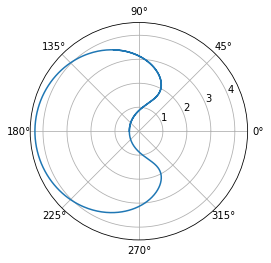

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from celmech.hamiltonian import AndoyerHamiltonian, CartesianAndoyerHamiltonian

H = AndoyerHamiltonian(1,2,0.4,np.pi)
Hc = CartesianAndoyerHamiltonian(1,2,0.4,np.pi)
tmax=10
Nout = 1000
times = np.linspace(0, tmax, Nout)
sol = np.zeros((2, Nout))
solc = np.zeros((2,Nout))
for i, time in enumerate(times):
    H.integrate(time)
    sol[:,i] = H.integrator.y
for i, time in enumerate(times):
    Hc.integrate(time)
    x,y = Hc.integrator.y
    solc[:,i] = [(x**2+y**2)/2, np.arctan2(y,x)]

ax = plt.subplot('111', projection='polar')
ax.plot(sol[1,:], sol[0,:])
#ax.plot(solc[1,:], solc[0,:])

In [19]:
a = [[1,2], [3,4]]

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from celmech.hamiltonian import AndoyerHamiltonian, CartesianAndoyerHamiltonian

#H = AndoyerHamiltonian(4,2,0.5,np.pi)
H = CartesianAndoyerHamiltonian(4,2,0.5,np.pi)

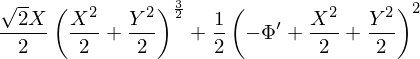

In [25]:
from sympy import init_printing
init_printing()
H.H

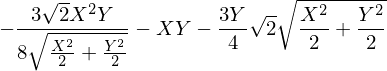

In [29]:
from sympy import S, diff
diff(H.derivs[S('X')], S('X'))

In [7]:
H.integrator.t

3.0

In [14]:
H.integrate(3)

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


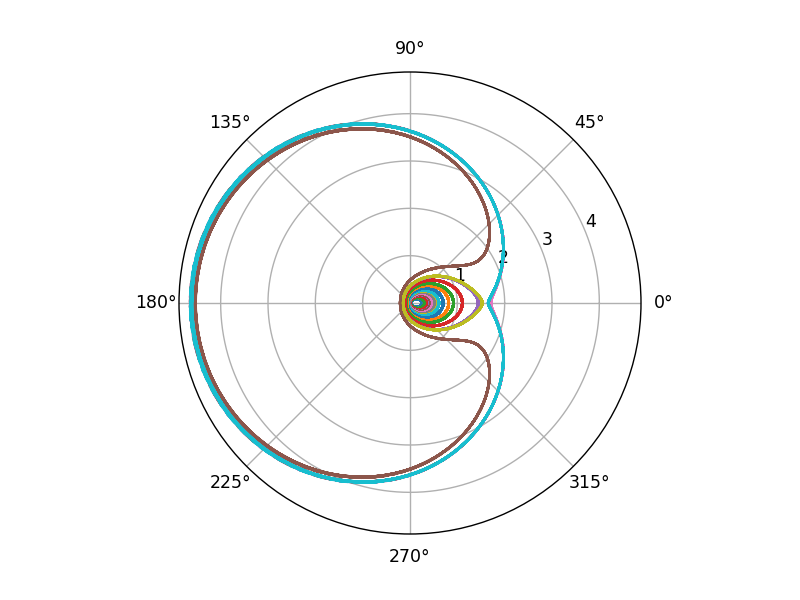

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
import numpy as np

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111', projection='polar')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        H = AndoyerHamiltonian(self.k,self.Phiprime,Phi,phi)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        sol = np.zeros((2, Nout))
        for i, time in enumerate(times):
            H.integrate(time)
            sol[:,i] = H.integrator.y
        self.ax.plot(sol[1,:], sol[0,:])

clicker = Clicker(1, 2)